<a href="https://colab.research.google.com/github/Arunima6688/dataAnalysis/blob/main/Wine_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Wine Quality Analysis**

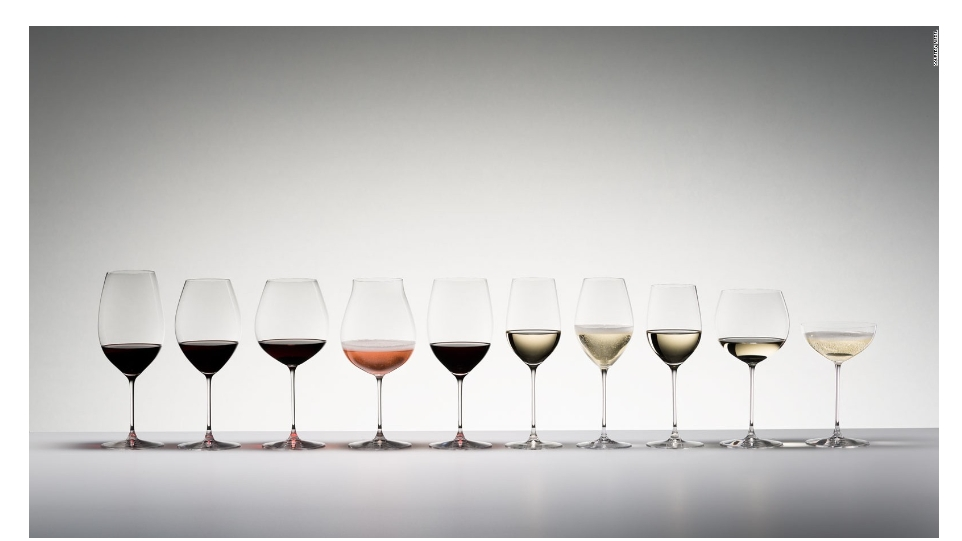

**Introduction**

The Wine Quality Dataset  consists of physicochemical properties and quality ratings for two types of Portuguese wines: red wine and white wine. These ratings are based on sensory data, where each wine sample is graded by experts on a scale of 0 to 10. The dataset is primarily used for building models to predict wine quality based on its physicochemical properties. In this dataset the features are the addon in the wine based on that we predict the alcohol content. here data analysis create a
ML model to predict the wine quality with good accuracy so we predict the quality of the wine

**About the data**

| Feature            | Description                                 |
|--------------------|---------------------------------------------|
| Fixed Acidity      | Acid level in the        |
| Volatile Acidity   | Acetic acid level (high levels are unpleasant) |
| Citric Acid        | Adds freshness and flavor                   |
| Residual Sugar     | Remaining sugar post-fermentation           |
| Chlorides          | Salt content                                |
| Free Sulfur Dioxide| Preservative to prevent oxidation           |
|Total Surfur dioxide| total amount of sulfur oxide|
| Density            | Relative density compared to water          |
| pH                 | Acidity level                               |
| Alcohol            | Percentage of alcohol                       |
|quantity | Quality of the wine|
|Id| unqiue idenification of the data|


**Import Dependencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

**Mount the Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Data Collection**

In [ ]:
wine_data=pd.read_csv("/content/gdrive/MyDrive/WineQT.csv")

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
wine_data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  ...  alcohol  quality    Id
0               7.4             0.700         0.00  ...      9.4        5     0
1               7.8             0.880         0.00  ...      9.8        5     1
2               7.8             0.760         0.04  ...      9.8        5     2
3              11.2             0.280         0.56  ...      9.8        6     3
4               7.4             0.700         0.00  ...      9.4        5     4
...             ...               ...          ...  ...      ...      ...   ...
1138            6.3             0.510         0.13  ...     11.0        6  1592
1139            6.8             0.620         0.08  ...      9.5        6  1593
1140            6.2             0.600         0.08  ...     10.5        5  1594
1141            5.9             0.550         0.10  ...     11.2        6  1595
1142            5.9             0.645         0.12  ...     10.2        5  1597

[1143 rows x 13 columns]>

 shows our dataset is dataframe model.describe used to generate descriptive about the dataset

In [ ]:
wine_data.shape

(1143, 13)

Diamention explanation .number of rows and columns

In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


info() provides a summary about our dataset

**Null values Handling**

In [ ]:
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


  Here take the sume of null values in each column.

  In our dataset there is no null values in the dataset. need to be handle

**Future Engineering**

 Checking duplicate values

In [ ]:
duplicate_values = wine_data.duplicated().sum()
duplicate_values

0

 In our dataset there is no duplcate values

**EDA**

 Eliminaie the data which is not a dependent feature. here it column Id

In [ ]:
winedata=wine_data.drop(columns=['Id'])
winedata.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
winedata.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
winedata.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


 corr() function provides relation between the features in the dataset. where negatively and positively correlaton.

<Axes: >

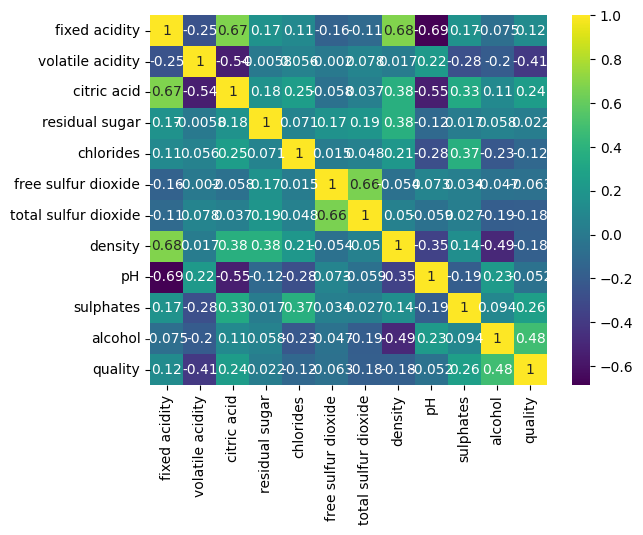

In [ ]:
sns.heatmap(winedata.corr(),cmap="viridis",annot=True)

  From correlation we can understan that citric acid and Ph are negatively correlated.
  PH and 	fixed acidity are negatively correlated

  Density and 	fixed acidity are postive correlation
  .
  free sulfur dioxide and density are negatively correlated


Text(0, 0.5, 'Frequency')

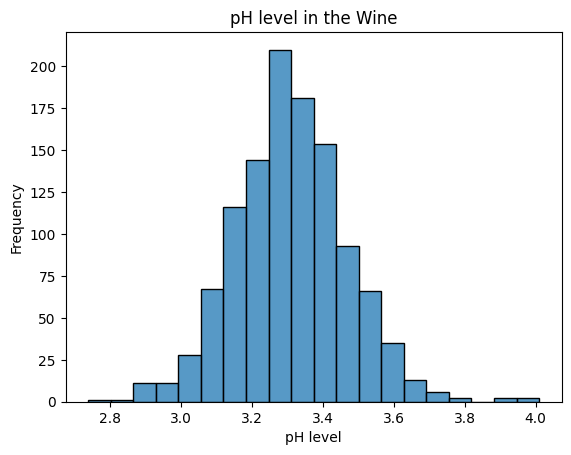

In [ ]:
sns.histplot(winedata["pH"],bins=20)
plt.title('pH level in the Wine')
plt.xlabel('pH level')
plt.ylabel('Frequency')

  The graph creates a histgraph of ph level in the wine

<ipython-input-41-ed99af6e09b5>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


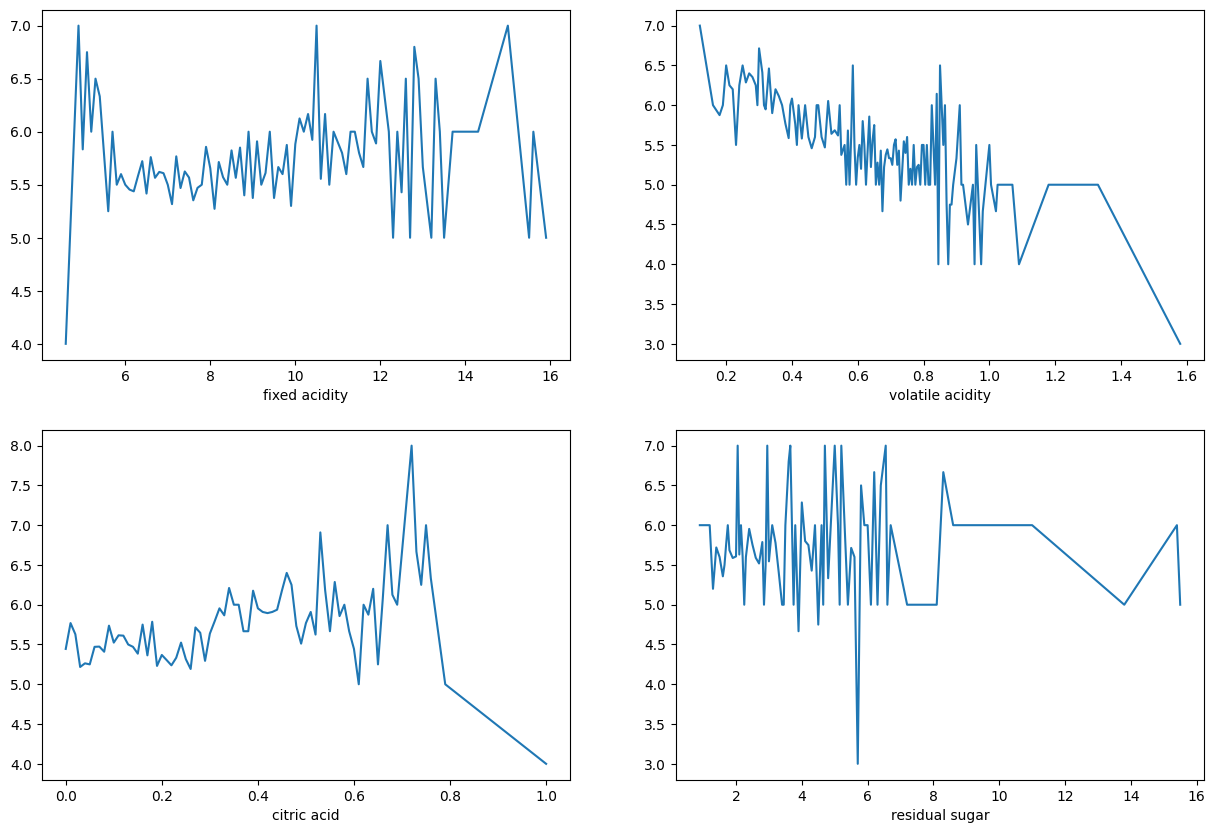

In [ ]:
features=['fixed acidity','volatile acidity','citric acid','residual sugar']
plt.subplots(figsize=(15,10))
for i,col in enumerate  (features):
  plt.subplot(2,2,i+1)
  winedata.groupby(col).mean()['quality'].plot()
plt.show()


 The various features that affect the quality.  
  
   The fixed acidity less than 6 and greater than 16  gets high quality wine.

   here not only one factor affect the quality so . less deatils only get from this graph

Text(0, 0.5, 'number')

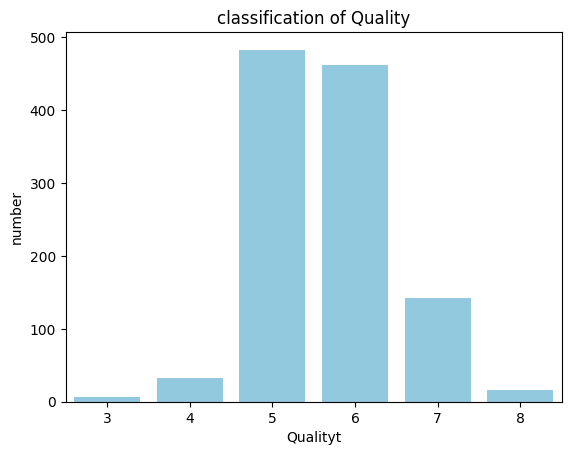

In [ ]:
sns.countplot(data=winedata,x="quality",color="skyblue")
plt.title('classification of Quality')
plt.xlabel('Qualityt')
plt.ylabel('number')

 the no of wines in each classification. 5 and 6 are more numbers in this dataset

<Axes: xlabel='density', ylabel='quality'>

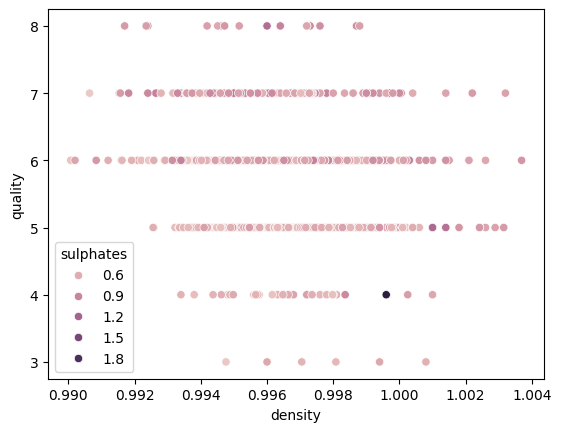

In [ ]:
sns.scatterplot(data=winedata,x="density",y="quality",hue="sulphates")

 scatter plot gives relationship between density quality and sulhates.

 less sulphates high quality.

**Modelinlg**

here we want a
ML model to predict the wine quality with good accuracy.  so we
 take this dataset is a classification problem. It contains target data is quality  that need to be predicted based on the input features contents that added in the wine (residual sugar,volatile acidity,fixed acidity,alcohol,etc). The task is to classify the observations into one of different classes based on Quality of wine here 3-8. Since the output is categorical (discrete classes), it is a classification problem

  spilting the model into independent(X) and target(Y)

In [ ]:
winedata.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
X=winedata.drop(columns=['quality'])
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
Y=winedata['quality']

In [ ]:
Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


 Split the X and Y for tain and test in 8:2 ratio

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("Y_train shape",Y_train.shape)
print("Y_test shape",Y_test.shape)

X_train shape (800, 11)
X_test shape (343, 11)
Y_train shape (800,)
Y_test shape (343,)


 Do the scaler standing

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Classification

In [ ]:
model=LogisticRegression() #choose LogisticRegression model in classification

In [ ]:
model.fit(X_train,Y_train) # learn the model

LogisticRegression()

In [ ]:
X_train_predict=model.predict(X_train) # predict the test with learned data

In [ ]:
X_train_predict

array([6, 7, 5, 6, 5, 6, 7, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6,
       5, 5, 7, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5,
       6, 6, 7, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 6, 7, 6, 6, 6, 5, 5, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 5, 7, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 6, 5, 5,
       6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6,
       5, 6, 6, 6, 5, 7, 7, 5, 5, 7, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 5, 6, 6, 6, 6, 5, 6, 6, 7, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5, 6, 7, 6, 7, 6, 6,
       6, 5, 6, 5, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 7, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5,

In [ ]:
accuracy_score(Y_train,X_train_predict)*100

62.375

In [ ]:
X_test_predict=model.predict(X_test)

In [ ]:
accuracy_score(Y_test,X_test_predict)*100

60.64139941690962

 The prediction rate is only 60%